In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
image = plt.imread('640px-Equalized_Hawkes_Bay_NZ.jpg')

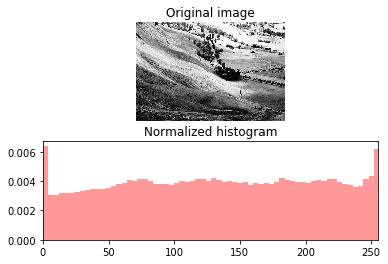

In [27]:
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(2,1,2)
plt.xlim((0, 255))

plt.title('Normalized histogram')
pixels = image.flatten()
plt.hist(pixels, bins=64, range=(0,256), normed=True, color='red', alpha=0.4)

plt.show()

# Plot the PDF and CDF of pixel intensities from a grayscale image

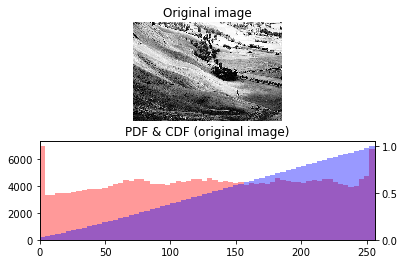

In [29]:
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               

plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()



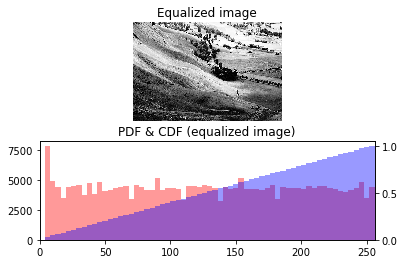

In [32]:
# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


# Extracting histograms from a color image

Plot histograms from a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. Download image http://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg 

In [33]:
image = plt.imread('hs-2004-32-b-small_web.jpg')

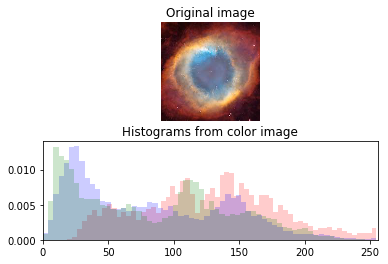

In [39]:
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

plt.show()

# Extracting bivariate histograms from a color image

View the joint variation of pixel intensity in two different channels.

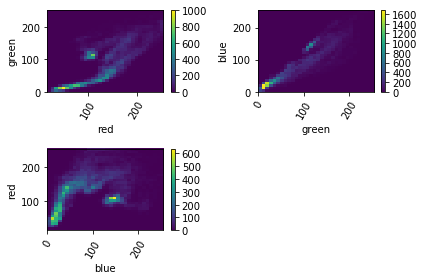

In [45]:
# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))
plt.colorbar()

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))
plt.colorbar()

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))
plt.colorbar()

plt.tight_layout()
plt.show()